In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('DataScience_exercise_data.csv')

In [5]:
df.shape

(4000, 7)

In [6]:
df.head()

,id,age,dist,income,gender,marital_status,target
0,1,73,4.371654,"90-99,999",M,S,1
1,2,89,1.582733,"100-149,999",M,NaN,1
2,3,85,1.223810,"10-19,999",F,S,1
3,4,76,2.962427,"90-99,999",M,M,1
4,5,76,2.594408,"10-19,999",M,S,1


In [7]:
df.isnull().sum()

id                  0
age                 0
dist                0
income            297
gender             24
marital_status    258
target              0
dtype: int64

In [11]:
df.head()

,id,age,dist,income,gender,marital_status,target
0,1,73,4.371654,"90-99,999",M,S,1
1,2,89,1.582733,"100-149,999",M,NaN,1
2,3,85,1.223810,"10-19,999",F,S,1
3,4,76,2.962427,"90-99,999",M,M,1
4,5,76,2.594408,"10-19,999",M,S,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
id                4000 non-null int64
age               4000 non-null int64
dist              4000 non-null float64
income            3703 non-null object
gender            3976 non-null object
marital_status    3742 non-null object
target            4000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 218.8+ KB


In [14]:
df.apply(lambda x:sum(x.isnull()),axis=0)

id                  0
age                 0
dist                0
income            297
gender             24
marital_status    258
target              0
dtype: int64

In [15]:
df['gender'].value_counts()

F    2003
M    1973
Name: gender, dtype: int64

In [16]:
df.gender = df.gender.fillna('F')

In [17]:
df.apply(lambda x:sum(x.isnull()),axis=0)

id                  0
age                 0
dist                0
income            297
gender              0
marital_status    258
target              0
dtype: int64

In [18]:
df['marital_status'].value_counts()

M    2419
S    1323
Name: marital_status, dtype: int64

In [19]:
df.marital_status = df.marital_status.fillna(method = 'ffill')

In [20]:
df['marital_status'].value_counts()

M    2577
S    1423
Name: marital_status, dtype: int64

In [21]:
df.apply(lambda x:sum(x.isnull()),axis=0)

id                  0
age                 0
dist                0
income            297
gender              0
marital_status      0
target              0
dtype: int64

In [23]:
df.income = df.income.fillna(method = 'ffill')

In [24]:
df.apply(lambda x:sum(x.isnull()),axis=0)

id                0
age               0
dist              0
income            0
gender            0
marital_status    0
target            0
dtype: int64

In [26]:
df.to_csv('Data_Analyst_Exercise_Baseline.csv')

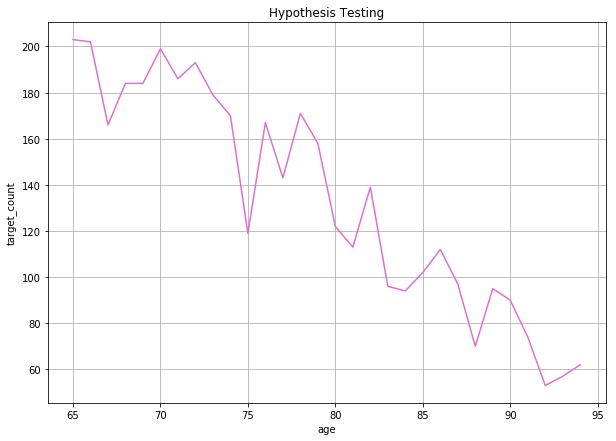

In [37]:
ax = df.groupby('age').count()['target'].plot(
color = 'orchid',
grid = True,
figsize=(10,7),
title = 'Hypothesis Testing')
ax.set_xlabel('age')
ax.set_ylabel('target_count')
plt.show()

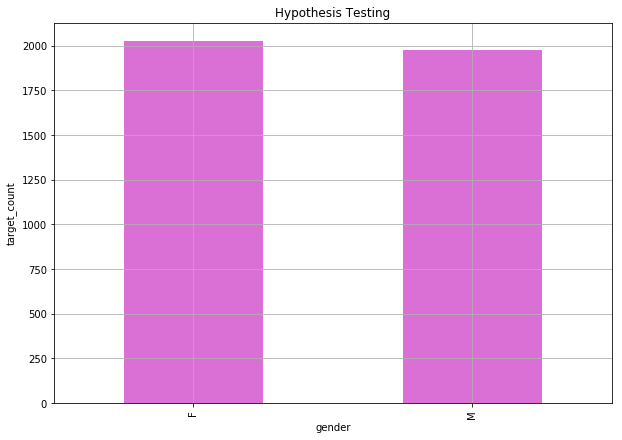

In [39]:
ax = df.groupby('gender').count()['target'].plot(
kind='bar',
color = 'orchid',
grid = True,
figsize=(10,7),
title = 'Hypothesis Testing')
ax.set_xlabel('gender')
ax.set_ylabel('target_count')
plt.show()

In [40]:
from scipy.stats import chi2_contingency
data = (df[df["target"]==1]["age"])
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)
